## Tarefa 1
1) indique dados da câmera que utilizará na disciplina (modelo da câmera, taxa de amostragem máxima, resolução máxima)

2) capture dezenas de imagens consecutivas de uma mesma cena, evitando alterações da mesma durante o processo de captura. Evite as primeiras dezenas de frames, já que muitas câmeras regulam automaticamente a imagem nas primeiras capturas

a) calcular média (grave como imagem o resultado) e estude o desvio padrão dos pixels

b) estude a correlação entre pixels distantes 1 ou mais unidades ao longo do tempo. Por exemplo, qual a correlação entre os pixels (x, y) e (x+1, y)? Como se comporta a correlação entre dois pixels em função da distância entre eles?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

<b>2)</b> As imagens foram capturadas no formato de video, antes de começar a filmar foi esperado o periodo de auto-ajuste da camera
<b>2.1)</b> Ao inves de processar os frames no momento em que sao lidos uma estrutura de "volume" é usada, permitindo uma melhor processamento dos dados e permitindo trabalhar sem precisar repassar o video novamente

In [3]:
cap = cv2.VideoCapture('video1.mp4')

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = cap.get(cv2.cv.CV_CAP_PROP_FPS_COUNT)
    shape_rgb = (cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT), cap.get(cv2.CAP_PROP_FRAME_WIDTH), 3)
    shape_grayscale = (cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT), cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH), 1)
else :
    fps = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    shape_rgb = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 3)
    shape_grayscale = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 1)

volume_rgb = []
volume_grayscale = []

first_flag = True

while(cap.isOpened()):
    ret, frame = cap.read()
    if(ret == True):
        if(first_flag):
            cv2.imwrite('first_frame_rgb.jpg', frame)
            print(frame.dtype)
        volume_rgb.append(frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if(first_flag):
            cv2.imwrite('first_frame_grayscale.jpg', gray)
            first_flag = False
        volume_grayscale.append(gray)
        cv2.imshow('frame',gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:   
        print(fps)
        print(shape_rgb)
        print(shape_grayscale)
        break

cap.release()
cv2.destroyAllWindows()
volume_rgb = np.array(volume_rgb)
volume_grayscale = np.array(volume_grayscale)

uint8
2229.0
(288, 352, 3)
(288, 352, 1)


<b>a)</b> O duas células abaixo criam uma imagem baseada na média de todos os frames, primeiro uma imagem é gerada usando os 3 canais(RGB) processados separadamente e posteriormente o mesmo é feito para o volume que está em <i>grayscale</i>.

In [64]:
# Mean of all RGB pixels
h = shape_rgb[0]
w = shape_rgb[1]
out_rgb = np.zeros(shape_rgb, dtype=np.uint8)
for height in range(0, h):
    for width in range(0, w):
        r = int(volume_rgb[:,height,width][0].mean())
        g = int(volume_rgb[:,height,width][1].mean())
        b = int(volume_rgb[:,height,width][2].mean())

        out_rgb[height, width] = np.array([r, g, b])

# cv2.normalize(out_rgb, out_rgb, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('saida rgb', out_rgb)
cv2.imwrite('mean_rgb.jpg', out_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
# Mean of all Grayscale pixels
h = shape_rgb[0]
w = shape_rgb[1]
out_grayscale = np.zeros(shape_grayscale, dtype=np.uint8)
for height in range(0, h):
    for width in range(0, w):
        out_grayscale[height, width] = int(volume_grayscale[:,height,width].mean())

# cv2.normalize(out_grayscale, out_grayscale, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('saida graysclae', out_grayscale)
cv2.imwrite('mean_grayscale.jpg', out_grayscale)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
# STD of all RGB pixels
h = shape_rgb[0]
w = shape_rgb[1]
r_grayscale = np.zeros(shape_grayscale, dtype=np.uint8)
g_grayscale = np.zeros(shape_grayscale, dtype=np.uint8)
b_grayscale = np.zeros(shape_grayscale, dtype=np.uint8)
for height in range(0, h):
    for width in range(0, w):
        r_grayscale[height, width] = volume_rgb[:,height,width, 0].std()
        g_grayscale[height, width] = volume_rgb[:,height,width, 1].std()
        b_grayscale[height, width] = volume_rgb[:,height,width, 2].std()

# cv2.normalize(out_grayscale, out_grayscale, 0, 255, cv2.NORM_MINMAX)
print('Red Max std: ', r_grayscale.max())
print('Red Min std: ', r_grayscale.min())
print('Red Mean std: ', r_grayscale.mean())
print('Red Median std: ', np.median(r_grayscale))
print('Red Std std: ', r_grayscale.std())
print('\n')
print('Green Max std: ', g_grayscale.max())
print('Green Min std: ', g_grayscale.min())
print('Green Mean std: ', g_grayscale.mean())
print('Green Median std: ', np.median(g_grayscale))
print('Green Std std: ', g_grayscale.std())
print('\n')
print('Blue Max std: ', b_grayscale.max())
print('Blue Min std: ', b_grayscale.min())
print('Blue Mean std: ', b_grayscale.mean())
print('Blue Median std: ', np.median(b_grayscale))
print('Blue Std std: ', b_grayscale.std())
print('\n')

Red Max std:  18
Red Min std:  0
Red Mean std:  3.3075185448232323
Red Median std:  4.0
Red Std std:  1.9521281783649787


Green Max std:  12
Green Min std:  0
Green Mean std:  1.3791133996212122
Green Median std:  1.0
Green Std std:  0.7990740399130738


Blue Max std:  15
Blue Min std:  0
Blue Mean std:  1.7818319917929293
Blue Median std:  1.0
Blue Std std:  1.1567309697949815




In [6]:
# STD of all Grayscale pixels
h = shape_rgb[0]
w = shape_rgb[1]
std_grayscale = np.zeros(shape_grayscale, dtype=np.uint8)
for height in range(0, h):
    for width in range(0, w):
        std_grayscale[height, width] = volume_grayscale[:,height,width].std()

# cv2.normalize(out_grayscale, out_grayscale, 0, 255, cv2.NORM_MINMAX)
print('Max std: ', std_grayscale.max())
print('Min std: ', std_grayscale.min())
print('Mean std: ', std_grayscale.mean())
print('Median std: ', np.median(std_grayscale))
print('Std std: ', std_grayscale.std())

Max std:  12
Min std:  0
Mean std:  1.110736268939394
Median std:  1.0
Std std:  0.7673631620219014


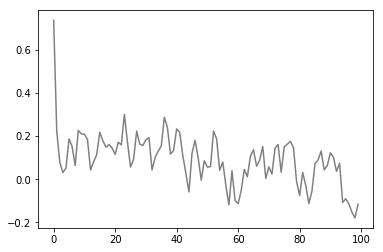

In [28]:
# Correlation of Grayscale Pixels
initial_point = (0, 0)
number_offsets = 100
number_frames = 2000;
correlations_grayscale = []
for i in range(1, number_offsets+1):
#     correlations_grayscale = np.append(
#         correlations_grayscale, 
#         np.corrcoef(
#             volume_grayscale[:number_frames,initial_point[0],initial_point[1]], 
#             volume_grayscale[:number_frames,initial_point[0],initial_point[1]+i]
#         )[0, 1]
#     )
    correlations_grayscale.append(np.corrcoef(
            volume_grayscale[:number_frames,initial_point[0],initial_point[1]], 
            volume_grayscale[:number_frames,initial_point[0]+i,initial_point[1]]
        )[0, 1])
# correlations_grayscale = np.array(correlations_grayscale)

plt.plot(np.arange(number_offsets), correlations_grayscale, color='gray')
plt.savefig('correlation_graysacle.png')

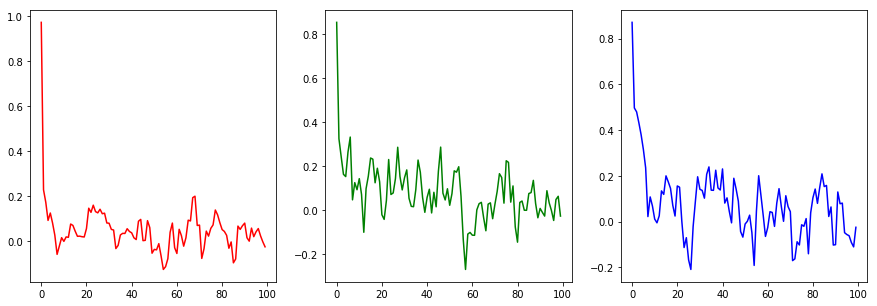

In [29]:
# Correlation of RGB Pixels
initial_point = (0, 0)
number_offsets = 100
number_frames = 2000;
correlations_r = []
correlations_g = []
correlations_b = []
for i in range(1, number_offsets+1):
    correlations_r = np.append(
        correlations_r, 
        np.corrcoef(
            volume_rgb[:number_frames,initial_point[0],initial_point[1],0], 
            volume_rgb[:number_frames,initial_point[0]+i,initial_point[1],0]
        )[0, 1]
    )
    correlations_g = np.append(
        correlations_g, 
        np.corrcoef(
            volume_rgb[:number_frames,initial_point[0],initial_point[1],1], 
            volume_rgb[:number_frames,initial_point[0]+i,initial_point[1],1]
        )[0, 1]
    )
    correlations_b = np.append(
        correlations_b, 
        np.corrcoef(
            volume_rgb[:number_frames,initial_point[0],initial_point[1],2], 
            volume_rgb[:number_frames,initial_point[0]+i,initial_point[1],2]
        )[0, 1]
    )
# correlations_grayscale = np.array(correlations_grayscale)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

plt.subplot(1, 3, 1)
plt.plot(np.arange(number_offsets), correlations_r, color='red')

plt.subplot(1, 3, 2)
plt.plot(np.arange(number_offsets), correlations_g, color='green')

plt.subplot(1, 3, 3)
plt.plot(np.arange(number_offsets), correlations_b, color='blue')
fig.savefig('correlation_rgb.png')

In [15]:
a = np.array([[[1,1,1],[2,2,2],[3,3,3]],[[4,4,4],[5,11,5],[6,6,6]],[[7,7,7],[8,8,8],[9,9,9]]])
a[1,1,1]

11